# Yeni Bölüm

In [ ]:
!pip install rembg onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.2 MB/s eta 0:00:00


In [ ]:


import os
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import timm
import torch.optim as optim
from sklearn.metrics import f1_score, precision_score, recall_score
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from google.colab import drive
from rembg import remove
import io
import cv2

# === AŞAMA 1: ÖN İŞLEME ===
def preprocess_multizoo(input_root, output_root_orig, output_root_edge):
    classes = sorted(os.listdir(input_root))
    for cls in tqdm(classes, desc="Sınıflar"):
        input_class_path = os.path.join(input_root, cls)
        output_class_orig = os.path.join(output_root_orig, cls)
        output_class_edge = os.path.join(output_root_edge, cls)
        os.makedirs(output_class_orig, exist_ok=True)
        os.makedirs(output_class_edge, exist_ok=True)

        for file in os.listdir(input_class_path):
            if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            input_path = os.path.join(input_class_path, file)
            try:
                with open(input_path, "rb") as f:
                    input_bytes = f.read()
                output_bytes = remove(input_bytes)
                img = Image.open(io.BytesIO(output_bytes)).convert('RGB')
                img_np = np.array(img)

                r, g, b = cv2.split(img_np)
                r_eq = cv2.equalizeHist(r)
                g_eq = cv2.equalizeHist(g)
                b_eq = cv2.equalizeHist(b)
                hist_eq = cv2.merge((r_eq, g_eq, b_eq))

                denoised = cv2.medianBlur(hist_eq, 5)

                processed_img = Image.fromarray(denoised)
                processed_img.save(os.path.join(output_class_orig, file))

                gray = cv2.cvtColor(denoised, cv2.COLOR_RGB2GRAY)
                edges = cv2.Canny(gray, 100, 200)
                edge_rgb = np.stack((edges,)*3, axis=-1)
                edge_img = Image.fromarray(edge_rgb)
                edge_img.save(os.path.join(output_class_edge, file))

            except Exception as e:
                print(f"{input_path} işlenemedi: {e}")

# Örnek kullanım (bir defa çağırman yeterli)
preprocess_multizoo('/content/drive/MyDrive/train', '/content/drive/MyDrive/processed/train', '/content/drive/MyDrive/processed/train_edges')


Sınıflar:   0%|          | 0/90 [00:00<?, ?it/s]


  0%|                                               | 0.00/176M [00:00<?, ?B/s]
  4%|█▋                                    | 7.64M/176M [00:00<00:02, 76.4MB/s]
  9%|███▎                                  | 15.3M/176M [00:00<00:04, 35.6MB/s]
 12%|████▌                                 | 21.0M/176M [00:00<00:05, 28.6MB/s]
 17%|██████▍                               | 29.6M/176M [00:00<00:03, 41.0MB/s]
 20%|███████▌                              | 35.1M/176M [00:00<00:04, 34.6MB/s]
 24%|█████████                             | 41.9M/176M [00:01<00:04, 33.3MB/s]
 28%|██████████▊                           | 50.1M/176M [00:01<00:02, 42.5MB/s]
 31%|███████████▉                          | 55.4M/176M [00:01<00:03, 36.9MB/s]
 36%|█████████████▌                        | 62.9M/176M [00:01<00:03, 36.8MB/s]
 41%|███████████████▍                      | 71.6M/176M [00:01<00:02, 46.4MB/s]
 44%|████████████████▋                     | 77.2M/176M [00:02<00:02, 39.0MB/s]
 48%|██████████████████                

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
MultiZoo Veri Seti için Transformer Tabanlı Sınıflandırma Modeli Eğitimi
Eğitim görüntü sayısı: 3816
Doğrulama görüntü sayısı: 954
Sınıf sayısı: 90


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



Epoch 1/30


Validating: 100%|██████████| 60/60 [05:44<00:00,  5.74s/it]


Train Loss: 3.4676, Train Acc: 0.4285, Train F1: 0.4398
Val Loss: 2.1338, Val Acc: 0.8354, Val F1: 0.8308
Precision: 0.8593, Recall: 0.8354, LR: 0.000100
Model kaydedildi! Doğrulama Skoru: 0.8354

Epoch 2/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.71it/s]


Train Loss: 1.3189, Train Acc: 0.8834, Train F1: 0.8816
Val Loss: 0.9641, Val Acc: 0.8732, Val F1: 0.8744
Precision: 0.8953, Recall: 0.8732, LR: 0.000100
Model kaydedildi! Doğrulama Skoru: 0.8732

Epoch 3/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.71it/s]


Train Loss: 0.5863, Train Acc: 0.9321, Train F1: 0.9317
Val Loss: 0.5475, Val Acc: 0.9140, Val F1: 0.9138
Precision: 0.9209, Recall: 0.9140, LR: 0.000100
Model kaydedildi! Doğrulama Skoru: 0.9140

Epoch 4/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.69it/s]


Train Loss: 0.3447, Train Acc: 0.9570, Train F1: 0.9569
Val Loss: 0.4906, Val Acc: 0.9078, Val F1: 0.9085
Precision: 0.9195, Recall: 0.9078, LR: 0.000100

Epoch 5/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.72it/s]


Train Loss: 0.2416, Train Acc: 0.9612, Train F1: 0.9610
Val Loss: 0.4281, Val Acc: 0.9140, Val F1: 0.9135
Precision: 0.9230, Recall: 0.9140, LR: 0.000100

Epoch 6/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.72it/s]


Train Loss: 0.1896, Train Acc: 0.9712, Train F1: 0.9713
Val Loss: 0.3916, Val Acc: 0.9277, Val F1: 0.9272
Precision: 0.9361, Recall: 0.9277, LR: 0.000100
Model kaydedildi! Doğrulama Skoru: 0.9277

Epoch 7/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.70it/s]


Train Loss: 0.1706, Train Acc: 0.9691, Train F1: 0.9691
Val Loss: 0.4516, Val Acc: 0.8962, Val F1: 0.8965
Precision: 0.9085, Recall: 0.8962, LR: 0.000100

Epoch 8/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.65it/s]


Train Loss: 0.1269, Train Acc: 0.9793, Train F1: 0.9793
Val Loss: 0.4320, Val Acc: 0.8962, Val F1: 0.8974
Precision: 0.9115, Recall: 0.8962, LR: 0.000100

Epoch 9/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.72it/s]


Train Loss: 0.0969, Train Acc: 0.9843, Train F1: 0.9842
Val Loss: 0.4886, Val Acc: 0.8889, Val F1: 0.8887
Precision: 0.9082, Recall: 0.8889, LR: 0.000100

Epoch 10/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.73it/s]


Train Loss: 0.0850, Train Acc: 0.9858, Train F1: 0.9858
Val Loss: 0.4271, Val Acc: 0.9057, Val F1: 0.9076
Precision: 0.9240, Recall: 0.9057, LR: 0.000050

Epoch 11/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.71it/s]


Train Loss: 0.0579, Train Acc: 0.9934, Train F1: 0.9934
Val Loss: 0.3408, Val Acc: 0.9287, Val F1: 0.9287
Precision: 0.9366, Recall: 0.9287, LR: 0.000050
Model kaydedildi! Doğrulama Skoru: 0.9287

Epoch 12/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.72it/s]


Train Loss: 0.0400, Train Acc: 0.9955, Train F1: 0.9955
Val Loss: 0.3327, Val Acc: 0.9245, Val F1: 0.9261
Precision: 0.9368, Recall: 0.9245, LR: 0.000050

Epoch 13/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.71it/s]


Train Loss: 0.0382, Train Acc: 0.9945, Train F1: 0.9945
Val Loss: 0.4052, Val Acc: 0.9088, Val F1: 0.9094
Precision: 0.9254, Recall: 0.9088, LR: 0.000050

Epoch 14/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.73it/s]


Train Loss: 0.0366, Train Acc: 0.9958, Train F1: 0.9958
Val Loss: 0.3591, Val Acc: 0.9151, Val F1: 0.9156
Precision: 0.9249, Recall: 0.9151, LR: 0.000050

Epoch 15/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.68it/s]


Train Loss: 0.0305, Train Acc: 0.9966, Train F1: 0.9966
Val Loss: 0.3358, Val Acc: 0.9214, Val F1: 0.9223
Precision: 0.9349, Recall: 0.9214, LR: 0.000025

Epoch 16/30


Validating: 100%|██████████| 60/60 [00:16<00:00,  3.72it/s]


Train Loss: 0.0226, Train Acc: 0.9982, Train F1: 0.9982
Val Loss: 0.3360, Val Acc: 0.9214, Val F1: 0.9216
Precision: 0.9293, Recall: 0.9214, LR: 0.000025
Erken durdurma! 5 epoch boyunca iyileşme olmadı.


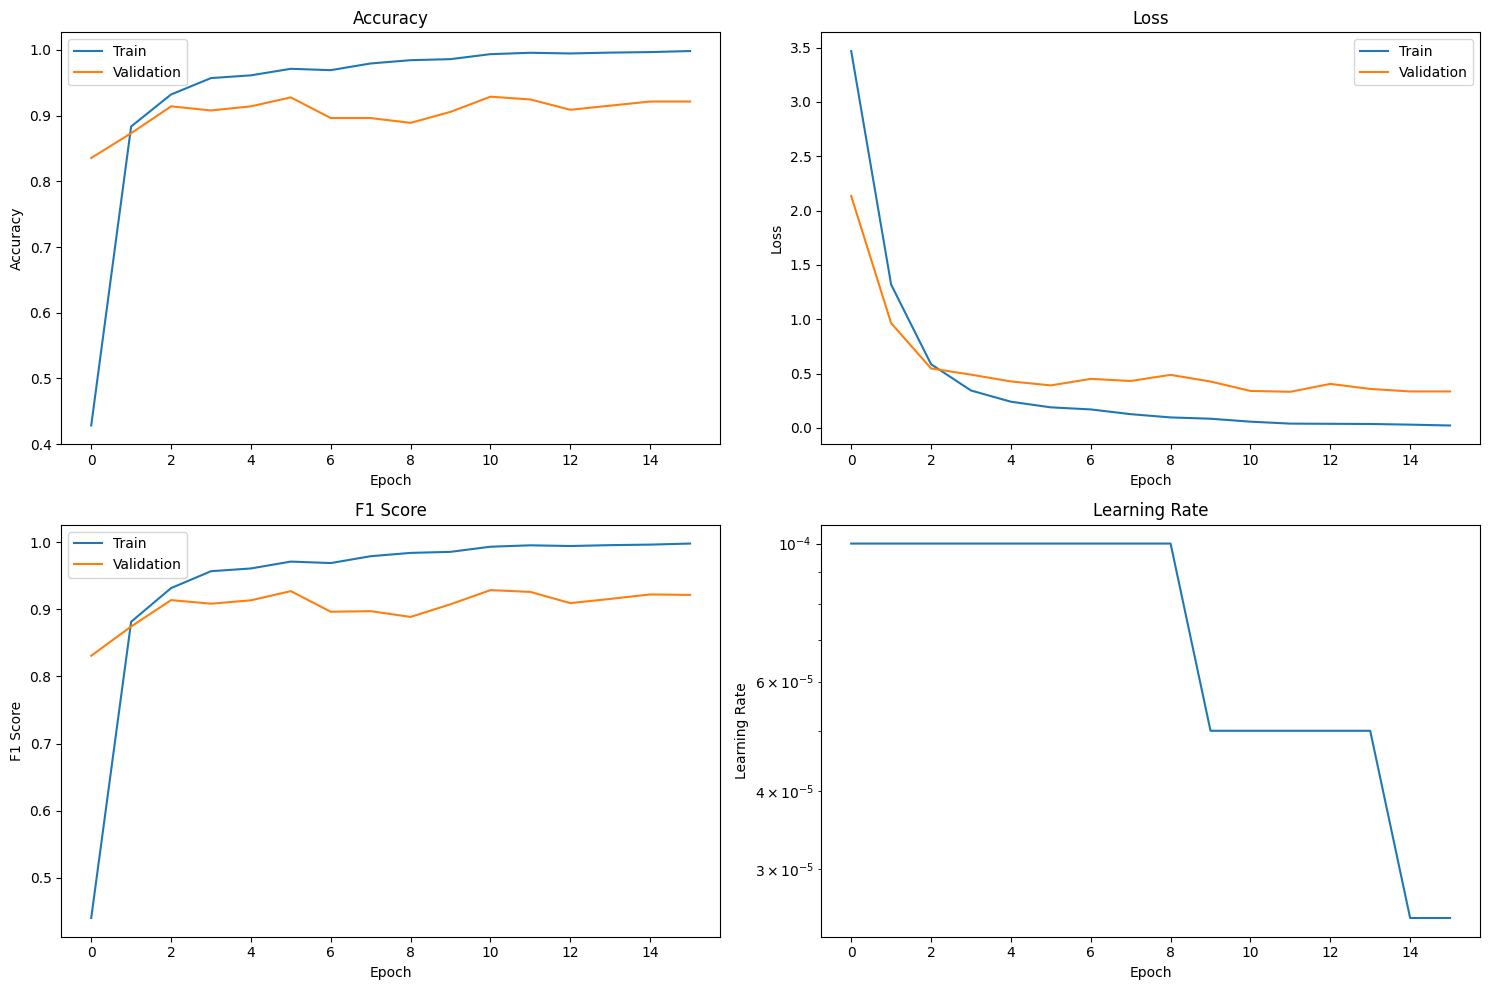

Model eğitimi tamamlandı ve modeller /content/drive/MyDrive/MultiZoo/output dizinine kaydedildi.


NameError: name 'train_dataset' is not defined

In [ ]:
# MultiZoo Veri Seti için Transformer Tabanlı Sınıflandırma Modeli
# Colab'de çalıştırmak ve modeli kaydetmek için

import os
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import timm
import torch.optim as optim
from google.colab import drive
from torch.utils.data import random_split

from sklearn.metrics import f1_score, precision_score, recall_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

# Google Drive'ı bağla
drive.mount('/content/drive')

# Veri seti yolu
DATA_DIR = '/content/drive/MyDrive/train'
EDGE_DIR = '/content/drive/MyDrive/processed/train_edges'
  # Veri seti dizinini kendi yolunuza göre değiştirin

# Sonuç klasörü
OUTPUT_DIR = '/content/drive/MyDrive/MultiZoo/output'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Cihaz kontrolü
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Veri Seti Sınıfı



class MultiZooProcessedDataset(Dataset):
    def __init__(self, orig_root, edge_root, transform=None, edge_transform=None):
        self.orig_root = orig_root
        self.edge_root = edge_root
        self.transform = transform
        self.edge_transform = edge_transform

        self.classes = sorted(os.listdir(orig_root))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

        self.image_paths = []
        self.labels = []

        for cls in self.classes:
            class_dir = os.path.join(orig_root, cls)
            for file in os.listdir(class_dir):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    self.image_paths.append((os.path.join(class_dir, file),
                                             os.path.join(edge_root, cls, file)))
                    self.labels.append(self.class_to_idx[cls])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        orig_path, edge_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            orig_img = Image.open(orig_path).convert('RGB')
            edge_img = Image.open(edge_path).convert('RGB')

            if self.transform:
                orig_img = self.transform(orig_img)
            if self.edge_transform:
                edge_img = self.edge_transform(edge_img)

            return orig_img, edge_img, label

        except Exception as e:
            print(f"Hata: {orig_path} veya {edge_path} yüklenemedi: {e}")
            dummy = torch.zeros((3, 224, 224))
            return dummy, dummy, label

# 2. Veri Dönüşümleri
# Eğitim verileri için daha agresif veri artırma
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.3),  # Bazı hayvan türleri için kullanışlı olabilir
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Doğrulama ve test için daha basit dönüşümler
val_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Kenar görüntüleri için dönüşümler
edge_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 3. Model Tanımı - Çift Girişli ViT
class DualInputViT(nn.Module):
    def __init__(self, num_classes=90, pretrained=True):
        super(DualInputViT, self).__init__()

        # İki ayrı görüntü akışı için Vision Transformer
        # Colab için daha hafif bir model (ViT Small) kullanıyoruz
        self.vit_original = timm.create_model('vit_small_patch16_224', pretrained=pretrained, num_classes=0)
        self.vit_edge = timm.create_model('vit_small_patch16_224', pretrained=pretrained, num_classes=0)

        # Özellik boyutunu al - ViT Small: 384, ViT Base: 768
        embed_dim = self.vit_original.embed_dim

        # Öznitelikleri birleştirdikten sonraki sınıflandırma katmanları
        self.classifier = nn.Sequential(
            nn.Linear(embed_dim * 2, 512),
            nn.LayerNorm(512),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(512, num_classes)
        )

    def forward(self, x_original, x_edge):
        # Her iki transformer'dan özellikleri çıkar
        feat_original = self.vit_original(x_original)
        feat_edge = self.vit_edge(x_edge)

        # Özellikleri birleştir
        combined_features = torch.cat((feat_original, feat_edge), dim=1)

        # Sınıflandırma
        output = self.classifier(combined_features)

        return output

# 4. Veri Yükleyicileri Oluştur


def create_data_loaders(batch_size=16, val_split=0.2):
    # Tek bir dataset'ten hem orijinal hem edge verileri alınır
    full_dataset = MultiZooProcessedDataset(
        orig_root=DATA_DIR,
        edge_root=EDGE_DIR,
        transform=train_transforms,
        edge_transform=edge_transforms
    )

    # Split oranına göre boyutları belirle
    val_size = int(len(full_dataset) * val_split)
    train_size = len(full_dataset) - val_size

    # Eğitim ve val setlerini böl
    train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

    # DataLoader oluştur
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

    # Dataset istatistiklerini yaz
    print(f"Eğitim görüntü sayısı: {len(train_dataset)}")
    print(f"Doğrulama görüntü sayısı: {len(val_dataset)}")
    print(f"Sınıf sayısı: {len(full_dataset.classes)}")

    return train_loader, val_loader, full_dataset

# 5. Eğitim ve Değerlendirme Fonksiyonları
def train_epoch(model, loader, criterion, optimizer, device, accumulation_steps=4):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    for i, (orig_imgs, edge_imgs, labels) in enumerate(tqdm(loader, desc="Training")):
        orig_imgs, edge_imgs, labels = orig_imgs.to(device), edge_imgs.to(device), labels.to(device)

        # İleri geçiş
        outputs = model(orig_imgs, edge_imgs)
        loss = criterion(outputs, labels)

        # Gradient accumulation
        loss = loss / accumulation_steps
        loss.backward()

        # Her 'accumulation_steps' adımda optimizer güncelleme
        if (i + 1) % accumulation_steps == 0 or (i + 1) == len(loader):
            optimizer.step()
            optimizer.zero_grad()

        # İstatistikler
        running_loss += loss.item() * accumulation_steps
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # F1 skoru için tahminleri topla
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # Epoch sonuçları
    train_loss = running_loss / len(loader)
    train_acc = correct / total
    train_f1 = f1_score(all_labels, all_preds, average='weighted')

    return train_loss, train_acc, train_f1

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for orig_imgs, edge_imgs, labels in tqdm(loader, desc="Validating"):
            orig_imgs, edge_imgs, labels = orig_imgs.to(device), edge_imgs.to(device), labels.to(device)

            # İleri geçiş
            outputs = model(orig_imgs, edge_imgs)
            loss = criterion(outputs, labels)

            # İstatistikler
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # F1 skoru için tahminleri topla
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Sonuçlar
    val_loss = running_loss / len(loader)
    val_acc = correct / total
    val_f1 = f1_score(all_labels, all_preds, average='weighted')

    # Ek metrikler
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)

    return val_loss, val_acc, val_f1, precision, recall, all_preds, all_labels

# 6. Öğrenme Eğrilerini Görselleştirme
def plot_training_curves(history):
    plt.figure(figsize=(15, 10))

    # Doğruluk eğrisi
    plt.subplot(2, 2, 1)
    plt.plot(history['train_acc'], label='Train')
    plt.plot(history['val_acc'], label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Kayıp eğrisi
    plt.subplot(2, 2, 2)
    plt.plot(history['train_loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # F1 skor eğrisi
    plt.subplot(2, 2, 3)
    plt.plot(history['train_f1'], label='Train')
    plt.plot(history['val_f1'], label='Validation')
    plt.title('F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()

    # Öğrenme oranı eğrisi
    plt.subplot(2, 2, 4)
    plt.plot(history['lr'])
    plt.title('Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, 'training_curves.png'))
    plt.show()

# 7. Ana Eğitim Döngüsü
def train_model(model, train_loader, val_loader, num_epochs=30, patience=5, batch_size=16, lr=1e-4):
    # Model, kayıp fonksiyonu ve optimize edici
    model = model.to(device)

    # Kayıp fonksiyonu - Sınıf dengesizliği için ağırlıklandırma
    class_counts = np.bincount(train_loader.dataset.dataset.labels)

    weights = torch.FloatTensor(1.0 / (class_counts + 1e-10))
    weights = weights / weights.sum() * len(class_counts)
    weights = weights.to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)

    # Optimizasyon
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)

    # Öğrenme oranı çizelgesi
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

    # Erken durdurma için değişkenler
    best_val_acc = 0.0
    patience_counter = 0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [],
               'train_f1': [], 'val_f1': [], 'lr': []}

    # Gradient accumulation adımları
    accumulation_steps = 4  # Her 4 mini-batch'den sonra güncelleme

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")

        # Eğitim
        train_loss, train_acc, train_f1 = train_epoch(model, train_loader, criterion, optimizer, device, accumulation_steps)

        # Doğrulama
        val_loss, val_acc, val_f1, precision, recall, _, _ = evaluate(model, val_loader, criterion, device)

        # Öğrenme oranını güncelle
        scheduler.step(val_f1)  # F1 skoruna göre öğrenme oranını ayarla

        # Geçerli öğrenme oranı
        current_lr = optimizer.param_groups[0]['lr']

        # Sonuçları kaydet
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['train_f1'].append(train_f1)
        history['val_f1'].append(val_f1)
        history['lr'].append(current_lr)

        # Sonuçları yazdır
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, LR: {current_lr:.6f}")

        # En iyi modeli kaydet
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_acc': val_acc,
                'val_f1': val_f1,
                'precision': precision,
                'recall': recall,
                'class_to_idx': train_loader.dataset.dataset.class_to_idx,
                'classes': train_loader.dataset.dataset.classes
            }
            torch.save(checkpoint, os.path.join(OUTPUT_DIR, 'multizoo_dual_vit_best.pth'))
            print(f"Model kaydedildi! Doğrulama Skoru: {val_acc:.4f}")
            patience_counter = 0
        else:
            patience_counter += 1

        # Erken durdurma
        if patience_counter >= patience:
            print(f"Erken durdurma! {patience} epoch boyunca iyileşme olmadı.")
            break

    # Son modeli kaydet (en iyi olmasa bile)
    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'val_acc': val_acc,
        'val_f1': val_f1,
        'class_to_idx': train_loader.dataset.dataset.class_to_idx,
        'classes': train_loader.dataset.dataset.classes
    }
    torch.save(checkpoint, os.path.join(OUTPUT_DIR, 'multizoo_dual_vit_final.pth'))

    # Eğitim eğrilerini görselleştir
    plot_training_curves(history)

    return model, history

# 8. Örnek Tahmin Fonksiyonu (Test Görüntüleri İçin)
def predict_and_visualize(model, image_path, class_names, transform, edge_transform, device):
    # Görüntüyü yükle
    img = Image.open(image_path).convert('RGB')

    # Kenar algılama
    img_np = np.array(img)
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    edges_rgb = np.stack((edges,) * 3, axis=-1)
    edge_img = Image.fromarray(edges_rgb)

    # Dönüşümleri uygula
    img_tensor = transform(img).unsqueeze(0).to(device)
    edge_tensor = edge_transform(edge_img).unsqueeze(0).to(device)

    # Tahmin yap
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor, edge_tensor)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        conf, pred_idx = torch.max(probs, 1)

    # Tahmin edilen sınıf ve güven skoru
    predicted_class = class_names[pred_idx.item()]
    confidence = conf.item()

    # Tüm sınıflar için olasılıkları al
    probs = probs.cpu().numpy()[0]

    # En yüksek 5 tahmini getir
    top5_idx = np.argsort(probs)[-5:][::-1]
    top5_classes = [class_names[i] for i in top5_idx]
    top5_probs = probs[top5_idx]

    # Görüntüyü, kenar görüntüsünü ve sonuçları göster
    plt.figure(figsize=(12, 5))

    # Orijinal görüntü
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Orijinal Görüntü')
    plt.axis('off')

    # Kenar görüntüsü
    plt.subplot(1, 3, 2)
    plt.imshow(edges_rgb)
    plt.title('Kenar Görüntüsü')
    plt.axis('off')

    # Top-5 tahminler
    plt.subplot(1, 3, 3)
    y_pos = np.arange(len(top5_classes))
    plt.barh(y_pos, top5_probs)
    plt.yticks(y_pos, top5_classes)
    plt.title('Top-5 Tahminler')

    plt.tight_layout()
    plt.show()

    print(f"Tahmin Edilen Sınıf: {predicted_class}")
    print(f"Güven Skoru: {confidence:.4f}")

    return predicted_class, confidence, top5_classes, top5_probs

# 9. Ana Fonksiyon
def main():
    print("MultiZoo Veri Seti için Transformer Tabanlı Sınıflandırma Modeli Eğitimi")

    # Veri yükleyicileri
    batch_size = 16  # Colab için batch size - GPU belleğine göre ayarlayın
    train_loader, val_loader, dataset = create_data_loaders(batch_size)


    # Model
    num_classes = len(dataset.classes)

    model = DualInputViT(num_classes=num_classes, pretrained=True)

    # Eğitim parametreleri
    num_epochs = 30
    patience = 5
    learning_rate = 1e-4

    # Modeli eğit
    trained_model, history = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=num_epochs,
        patience=patience,
        batch_size=batch_size,
        lr=learning_rate
    )

    print(f"Model eğitimi tamamlandı ve modeller {OUTPUT_DIR} dizinine kaydedildi.")

    # Model mimarisini ve öğrenme eğrilerini içeren bir özet dosyası oluştur
    with open(os.path.join(OUTPUT_DIR, 'model_summary.txt'), 'w') as f:
        f.write("MultiZoo Transformer Modeli Özeti\n")
        f.write("================================\n\n")
        f.write(f"Eğitim veri seti boyutu: {len(train_dataset)}\n")
        f.write(f"Doğrulama veri seti boyutu: {len(val_dataset)}\n")
        f.write(f"Sınıf sayısı: {num_classes}\n\n")
        f.write("Model Mimarisi:\n")
        f.write("- İki Vision Transformer (ViT Small) girişli\n")
        f.write("- Özellik birleştirme ve sınıflandırma katmanları\n\n")
        f.write("Eğitim Parametreleri:\n")
        f.write(f"- Batch size: {batch_size}\n")
        f.write(f"- Başlangıç öğrenme oranı: {learning_rate}\n")
        f.write(f"- Maksimum epoch sayısı: {num_epochs}\n")
        f.write(f"- Erken durdurma sabrı: {patience}\n\n")
        f.write("En İyi Model Metrikleri:\n")
        f.write(f"- Doğrulama doğruluğu: {max(history['val_acc']):.4f}\n")
        f.write(f"- Doğrulama F1 skoru: {max(history['val_f1']):.4f}\n")

    print("Model özeti oluşturuldu ve kaydedildi.")

    # Test örneği - eğer test veri seti mevcutsa
    test_dir = os.path.join(DATA_DIR, 'test')
    if os.path.exists(test_dir):
        print("\nTest görüntüleri üzerinde örnek tahminler yapılıyor...")

        # Tüm sınıf klasörlerini dön
        for class_name in sorted(os.listdir(test_dir))[:3]:  # İlk 3 sınıfı dene
            class_dir = os.path.join(test_dir, class_name)
            if os.path.isdir(class_dir):
                # Her sınıftan bir görüntü al
                img_files = [f for f in os.listdir(class_dir)
                           if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                if img_files:
                    img_path = os.path.join(class_dir, img_files[0])
                    print(f"\nGerçek sınıf: {class_name}")
                    predict_and_visualize(
                        trained_model,
                        img_path,
                        train_dataset.classes,
                        val_transforms,
                        edge_transforms,
                        device
                    )
    else:
        print("\nTest veri seti bulunamadı. Test görüntüleri daha sonra denenebilir.")

if __name__ == "__main__":
    main()

In [ ]:
import torch
import os

# Cihaz
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model sınıfı (önceden tanımlanmalı)
class DualInputViT(nn.Module):
    def __init__(self, num_classes=90, pretrained=True):
        super(DualInputViT, self).__init__()
        import timm
        self.vit_original = timm.create_model('vit_small_patch16_224', pretrained=pretrained, num_classes=0)
        self.vit_edge = timm.create_model('vit_small_patch16_224', pretrained=pretrained, num_classes=0)
        embed_dim = self.vit_original.embed_dim
        self.classifier = nn.Sequential(
            nn.Linear(embed_dim * 2, 512),
            nn.LayerNorm(512),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(512, num_classes)
        )

    def forward(self, x_original, x_edge):
        feat_original = self.vit_original(x_original)
        feat_edge = self.vit_edge(x_edge)
        combined = torch.cat((feat_original, feat_edge), dim=1)
        return self.classifier(combined)

# Kayıtlı modeli yükleme
checkpoint_path = '/content/drive/MyDrive/MultiZoo/output/multizoo_dual_vit_best.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)

# Sınıf sayısı
num_classes = len(checkpoint['classes'])

# Modeli oluştur ve ağırlıkları yükle
model = DualInputViT(num_classes=num_classes)
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)
model.eval()

print("Model başarıyla yüklendi!")

# === TXT dosyalarını yaz ===
output_dir = '/content/drive/MyDrive/MultiZoo/output'

# classes.txt
with open(os.path.join(output_dir, 'classes.txt'), 'w', encoding='utf-8') as f:
    for cls in checkpoint['classes']:
        f.write(f"{cls}\n")

# class_to_idx.txt
with open(os.path.join(output_dir, 'class_to_idx.txt'), 'w', encoding='utf-8') as f:
    for cls, idx in checkpoint['class_to_idx'].items():
        f.write(f"{cls}:{idx}\n")

print("Sınıf dosyaları oluşturuldu: classes.txt ve class_to_idx.txt")



Model başarıyla yüklendi!
Sınıf dosyaları oluşturuldu: classes.txt ve class_to_idx.txt
